In [6]:
import numpy
b = numpy.load('mnist.npz')
print(b.files)

['x_test', 'x_train', 'y_train', 'y_test']


60000

In [8]:
mask = b["y_train"] == 0

In [10]:
dataset = b["x_train"][mask]


In [12]:
dataset.shape

(5923, 28, 28)

In [33]:
import random
import numpy as np
out = np.stack((dataset,dataset,dataset))
label = np.zeros((dataset.shape[0]))
print(out.shape)
out = np.moveaxis(out, 0, 1) 
white_image = np.zeros((28,28))
for e,a in enumerate(dataset):
    if random.random()<.05:
        out[e] = np.stack((a,a,white_image))
        label[e] = 1
    else:
        out[e] = np.stack((a,white_image,white_image))

(3, 5923, 28, 28)


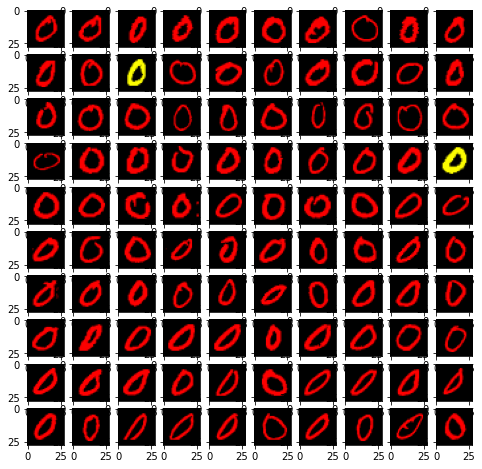

In [34]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(10,10, figsize=(8,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(np.moveaxis(out[i],0,2))

In [38]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.Tensor(out) # transform to torch tensor
tensor_y = torch.Tensor(label)

my_dataset = TensorDataset(tensor_x,tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset) # create your dataloader

In [39]:
torch.save(my_dataloader,'superfast_dataloader')